## Analyze A/B Test Results

A/B tests are very commonly performed by data analysts and data scientists.  It is important that you get some practice working with the difficulties of these 
## Table of Contents
  
- [Part I - Probability](#probability)
- [Part II - A/B Test](#ab_test)
- [Part III - Regression](#regression)
 
 

 

In [1]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
%matplotlib inline{
 "cells": [
  {
   "cell_type": "markdown",
   "metadata": {},
   "source": [
    "## Analyze A/B Test Results\n",
    "\n",
    "A/B tests are very commonly performed by data analysts and data scientists.  It is important that you get some practice working with the difficulties of these \n",
    "## Table of Contents\n",
    "  \n",
    "- [Part I - Probability](#probability)\n",
    "- [Part II - A/B Test](#ab_test)\n",
    "- [Part III - Regression](#regression)\n",
    " \n",
    " \n",
    "\n",
    " "
   ]
  },
  {
   "cell_type": "code",
   "execution_count": 1,
   "metadata": {},
   "outputs": [],
   "source": [
    "import pandas as pd\n",
    "import numpy as np\n",
    "import random\n",
    "import matplotlib.pyplot as plt\n",
    "%matplotlib inline\n",
    "#We are setting the seed to assure you get the same answers on quizzes as we set up\n",
    "random.seed(42)"
   ]
  },
  {
   "cell_type": "code",
   "execution_count": 3,
   "metadata": {},
   "outputs": [
    {
     "data": {
      "text/html": [
       "<div>\n",
       "<style scoped>\n",
       "    .dataframe tbody tr th:only-of-type {\n",
       "        vertical-align: middle;\n",
       "    }\n",
       "\n",
       "    .dataframe tbody tr th {\n",
       "        vertical-align: top;\n",
       "    }\n",
       "\n",
       "    .dataframe thead th {\n",
       "        text-align: right;\n",
       "    }\n",
       "</style>\n",
       "<table border=\"1\" class=\"dataframe\">\n",
       "  <thead>\n",
       "    <tr style=\"text-align: right;\">\n",
       "      <th></th>\n",
       "      <th>user_id</th>\n",
       "      <th>timestamp</th>\n",
       "      <th>group</th>\n",
       "      <th>landing_page</th>\n",
       "      <th>converted</th>\n",
       "    </tr>\n",
       "  </thead>\n",
       "  <tbody>\n",
       "    <tr>\n",
       "      <th>0</th>\n",
       "      <td>851104</td>\n",
       "      <td>2017-01-21 22:11:48.556739</td>\n",
       "      <td>control</td>\n",
       "      <td>old_page</td>\n",
       "      <td>0</td>\n",
       "    </tr>\n",
       "    <tr>\n",
       "      <th>1</th>\n",
       "      <td>804228</td>\n",
       "      <td>2017-01-12 08:01:45.159739</td>\n",
       "      <td>control</td>\n",
       "      <td>old_page</td>\n",
       "      <td>0</td>\n",
       "    </tr>\n",
       "    <tr>\n",
       "      <th>2</th>\n",
       "      <td>661590</td>\n",
       "      <td>2017-01-11 16:55:06.154213</td>\n",
       "      <td>treatment</td>\n",
       "      <td>new_page</td>\n",
       "      <td>0</td>\n",
       "    </tr>\n",
       "    <tr>\n",
       "      <th>3</th>\n",
       "      <td>853541</td>\n",
       "      <td>2017-01-08 18:28:03.143765</td>\n",
       "      <td>treatment</td>\n",
       "      <td>new_page</td>\n",
       "      <td>0</td>\n",
       "    </tr>\n",
       "    <tr>\n",
       "      <th>4</th>\n",
       "      <td>864975</td>\n",
       "      <td>2017-01-21 01:52:26.210827</td>\n",
       "      <td>control</td>\n",
       "      <td>old_page</td>\n",
       "      <td>1</td>\n",
       "    </tr>\n",
       "  </tbody>\n",
       "</table>\n",
       "</div>"
      ],
      "text/plain": [
       "   user_id                   timestamp      group landing_page  converted\n",
       "0   851104  2017-01-21 22:11:48.556739    control     old_page          0\n",
       "1   804228  2017-01-12 08:01:45.159739    control     old_page          0\n",
       "2   661590  2017-01-11 16:55:06.154213  treatment     new_page          0\n",
       "3   853541  2017-01-08 18:28:03.143765  treatment     new_page          0\n",
       "4   864975  2017-01-21 01:52:26.210827    control     old_page          1"
      ]
     },
     "execution_count": 3,
     "metadata": {},
     "output_type": "execute_result"
    }
   ],
   "source": [
    "df=pd.read_csv('ab_data.csv')\n",
    "df.head(5)"
   ]
  },
  {
   "cell_type": "markdown",
   "metadata": {},
   "source": [
    " The number of unique users in the dataset."
   ]
  },
  {
   "cell_type": "code",
   "execution_count": 4,
   "metadata": {},
   "outputs": [
    {
     "data": {
      "text/plain": [
       "290584"
      ]
     },
     "execution_count": 4,
     "metadata": {},
     "output_type": "execute_result"
    }
   ],
   "source": [
    "df['user_id'].nunique()"
   ]
  },
  {
   "cell_type": "markdown",
   "metadata": {},
   "source": [
    "The proportion of users converted."
   ]
  },
  {
   "cell_type": "code",
   "execution_count": 5,
   "metadata": {},
   "outputs": [
    {
     "data": {
      "text/plain": [
       "0.12104245244060237"
      ]
     },
     "execution_count": 5,
     "metadata": {},
     "output_type": "execute_result"
    }
   ],
   "source": [
    "converted_prop=df[df['converted']==1]['user_id'].nunique()/df['user_id'].nunique()\n",
    "converted_prop"
   ]
  },
  {
   "cell_type": "markdown",
   "metadata": {},
   "source": [
    "The number of times the `new_page` and `treatment` don't line up."
   ]
  },
  {
   "cell_type": "code",
   "execution_count": 7,
   "metadata": {},
   "outputs": [
    {
     "data": {
      "text/plain": [
       "3893"
      ]
     },
     "execution_count": 7,
     "metadata": {},
     "output_type": "execute_result"
    }
   ],
   "source": [
    "dx=df[df['group']=='treatment']\n",
    "dx1=dx[dx['landing_page']=='old_page']\n",
    "dx2=df[df['group']=='control']\n",
    "dx3=dx2[dx2['landing_page']=='new_page']\n",
    "dx3['user_id'].count()+dx1['user_id'].count()"
   ]
  },
  {
   "cell_type": "markdown",
   "metadata": {},
   "source": [
    "Do any of the rows have missing values?"
   ]
  },
  {
   "cell_type": "code",
   "execution_count": 8,
   "metadata": {},
   "outputs": [
    {
     "name": "stdout",
     "output_type": "stream",
     "text": [
      "<class 'pandas.core.frame.DataFrame'>\n",
      "RangeIndex: 294478 entries, 0 to 294477\n",
      "Data columns (total 5 columns):\n",
      " #   Column        Non-Null Count   Dtype \n",
      "---  ------        --------------   ----- \n",
      " 0   user_id       294478 non-null  int64 \n",
      " 1   timestamp     294478 non-null  object\n",
      " 2   group         294478 non-null  object\n",
      " 3   landing_page  294478 non-null  object\n",
      " 4   converted     294478 non-null  int64 \n",
      "dtypes: int64(2), object(3)\n",
      "memory usage: 11.2+ MB\n"
     ]
    }
   ],
   "source": [
    "df.info()\n",
    "#NO there is no missing values "
   ]
  },
  {
   "cell_type": "markdown",
   "metadata": {},
   "source": [
    "create a new database to be sure all rows  truly received the new or old page."
   ]
  },
  {
   "cell_type": "code",
   "execution_count": 9,
   "metadata": {},
   "outputs": [
    {
     "name": "stdout",
     "output_type": "stream",
     "text": [
      "<class 'pandas.core.frame.DataFrame'>\n",
      "Int64Index: 290585 entries, 2 to 294476\n",
      "Data columns (total 5 columns):\n",
      " #   Column        Non-Null Count   Dtype \n",
      "---  ------        --------------   ----- \n",
      " 0   user_id       290585 non-null  int64 \n",
      " 1   timestamp     290585 non-null  object\n",
      " 2   group         290585 non-null  object\n",
      " 3   landing_page  290585 non-null  object\n",
      " 4   converted     290585 non-null  int64 \n",
      "dtypes: int64(2), object(3)\n",
      "memory usage: 13.3+ MB\n"
     ]
    }
   ],
   "source": [
    "dx=df[df['group']=='treatment']\n",
    "dx1=dx[dx['landing_page']=='new_page']\n",
    " \n",
    "dx=df[df['group']=='control']\n",
    "dx2=dx[dx['landing_page']=='old_page']\n",
    " \n",
    "df2=pd.DataFrame(dx1.append(dx2))  \n",
    "df2.shape , dx2.shape , dx1.shape\n",
    "df2.info()"
   ]
  },
  {
   "cell_type": "code",
   "execution_count": 10,
   "metadata": {},
   "outputs": [
    {
     "data": {
      "text/plain": [
       "0"
      ]
     },
     "execution_count": 10,
     "metadata": {},
     "output_type": "execute_result"
    }
   ],
   "source": [
    "# Double Check all of the correct rows were removed - this should be 0\n",
    "df2[((df2['group'] == 'treatment') == (df2['landing_page'] == 'new_page')) == False].shape[0]"
   ]
  },
  {
   "cell_type": "markdown",
   "metadata": {},
   "source": [
    "The number of unique users in the dataset."
   ]
  },
  {
   "cell_type": "code",
   "execution_count": 12,
   "metadata": {},
   "outputs": [
    {
     "data": {
      "text/plain": [
       "290584"
      ]
     },
     "execution_count": 12,
     "metadata": {},
     "output_type": "execute_result"
    }
   ],
   "source": [
    "df2.user_id.nunique()"
   ]
  },
  {
   "cell_type": "markdown",
   "metadata": {},
   "source": [
    "the repeated **user_id** in **df2** "
   ]
  },
  {
   "cell_type": "code",
   "execution_count": 20,
   "metadata": {},
   "outputs": [
    {
     "data": {
      "text/html": [
       "<div>\n",
       "<style scoped>\n",
       "    .dataframe tbody tr th:only-of-type {\n",
       "        vertical-align: middle;\n",
       "    }\n",
       "\n",
       "    .dataframe tbody tr th {\n",
       "        vertical-align: top;\n",
       "    }\n",
       "\n",
       "    .dataframe thead th {\n",
       "        text-align: right;\n",
       "    }\n",
       "</style>\n",
       "<table border=\"1\" class=\"dataframe\">\n",
       "  <thead>\n",
       "    <tr style=\"text-align: right;\">\n",
       "      <th></th>\n",
       "      <th>user_id</th>\n",
       "      <th>timestamp</th>\n",
       "      <th>group</th>\n",
       "      <th>landing_page</th>\n",
       "      <th>converted</th>\n",
       "    </tr>\n",
       "  </thead>\n",
       "  <tbody>\n",
       "    <tr>\n",
       "      <th>1899</th>\n",
       "      <td>773192</td>\n",
       "      <td>2017-01-09 05:37:58.781806</td>\n",
       "      <td>treatment</td>\n",
       "      <td>new_page</td>\n",
       "      <td>0</td>\n",
       "    </tr>\n",
       "    <tr>\n",
       "      <th>2893</th>\n",
       "      <td>773192</td>\n",
       "      <td>2017-01-14 02:55:59.590927</td>\n",
       "      <td>treatment</td>\n",
       "      <td>new_page</td>\n",
       "      <td>0</td>\n",
       "    </tr>\n",
       "  </tbody>\n",
       "</table>\n",
       "</div>"
      ],
      "text/plain": [
       "      user_id                   timestamp      group landing_page  converted\n",
       "1899   773192  2017-01-09 05:37:58.781806  treatment     new_page          0\n",
       "2893   773192  2017-01-14 02:55:59.590927  treatment     new_page          0"
      ]
     },
     "execution_count": 20,
     "metadata": {},
     "output_type": "execute_result"
    }
   ],
   "source": [
    "userId=df2.user_id.value_counts().index[0]\n",
    "df2[df2['user_id']==userId ]"
   ]
  },
  {
   "cell_type": "markdown",
   "metadata": {},
   "source": [
    "Removing **one** of the rows with a duplicate **user_id**, "
   ]
  },
  {
   "cell_type": "code",
   "execution_count": 19,
   "metadata": {},
   "outputs": [
    {
     "data": {
      "text/plain": [
       "(290584, 5)"
      ]
     },
     "execution_count": 19,
     "metadata": {},
     "output_type": "execute_result"
    }
   ],
   "source": [
    "df2.drop(index=1899,axis=0,inplace=True)\n",
    "df2.shape"
   ]
  },
  {
   "cell_type": "markdown",
   "metadata": {},
   "source": [
    "the probability of an individual converting regardless of the page they receive is"
   ]
  },
  {
   "cell_type": "code",
   "execution_count": 20,
   "metadata": {},
   "outputs": [
    {
     "data": {
      "text/plain": [
       "0.11959708724499628"
      ]
     },
     "execution_count": 20,
     "metadata": {},
     "output_type": "execute_result"
    }
   ],
   "source": [
    "df2['converted'].mean()\n",
    "#0.1196"
   ]
  },
  {
   "cell_type": "markdown",
   "metadata": {},
   "source": [
    " Given that an individual was in the `control` group, probability they converted is"
   ]
  },
  {
   "cell_type": "code",
   "execution_count": 21,
   "metadata": {},
   "outputs": [
    {
     "data": {
      "text/plain": [
       "0.1203863045004612"
      ]
     },
     "execution_count": 21,
     "metadata": {},
     "output_type": "execute_result"
    }
   ],
   "source": [
    "df2[df2['group']=='control']['converted'].mean()\n",
    "#0.1203"
   ]
  },
  {
   "cell_type": "markdown",
   "metadata": {},
   "source": [
    "c. Given that an individual was in the `treatment` group, the probability they converted is"
   ]
  },
  {
   "cell_type": "code",
   "execution_count": 22,
   "metadata": {},
   "outputs": [
    {
     "data": {
      "text/plain": [
       "0.11880724790277405"
      ]
     },
     "execution_count": 22,
     "metadata": {},
     "output_type": "execute_result"
    }
   ],
   "source": [
    "df2[df2['group']=='treatment']['converted'].mean()\n",
    "#0.1188"
   ]
  },
  {
   "cell_type": "markdown",
   "metadata": {},
   "source": [
    "the probability that an individual received the new page"
   ]
  },
  {
   "cell_type": "code",
   "execution_count": 23,
   "metadata": {},
   "outputs": [
    {
     "data": {
      "text/plain": [
       "0.5000636646764286"
      ]
     },
     "execution_count": 23,
     "metadata": {},
     "output_type": "execute_result"
    }
   ],
   "source": [
    "(df2['landing_page']=='new_page').mean()"
   ]
  },
  {
   "cell_type": "markdown",
   "metadata": {},
   "source": [
    "<a id='ab_test'></a>\n",
    "### Part II - A/B Test\n",
    " "
   ]
  },
  {
   "cell_type": "markdown",
   "metadata": {},
   "source": [
    " \n",
    "**$h_{0}$**=  **$p_{old}$** - **$p_{new}$**>=0 , \n",
    "\n",
    "**$h_{1}$**= **$p_{new}$**-**$p_{old}$** >0"
   ]
  },
  {
   "cell_type": "markdown",
   "metadata": {},
   "source": [
    "  \n",
    "Perform the sampling distribution for the difference in **converted** between the two pages over 10,000 iterations of calculating an estimate from the null.  <br><br>\n",
    " "
   ]
  },
  {
   "cell_type": "markdown",
   "metadata": {},
   "source": [
    "the **convert rate** for $p_{new}$ under the null"
   ]
  },
  {
   "cell_type": "code",
   "execution_count": 30,
   "metadata": {},
   "outputs": [],
   "source": [
    "P_new=df2[df2['landing_page']=='new_page']['converted'].mean()\n"
   ]
  },
  {
   "cell_type": "markdown",
   "metadata": {},
   "source": [
    "the **convert rate** for $p_{old}$ under the null<br><br>"
   ]
  },
  {
   "cell_type": "code",
   "execution_count": 31,
   "metadata": {},
   "outputs": [],
   "source": [
    "P_old=df2[df2['landing_page']=='old_page']['converted'].mean()\n",
    " "
   ]
  },
  {
   "cell_type": "code",
   "execution_count": 29,
   "metadata": {},
   "outputs": [
    {
     "data": {
      "text/plain": [
       "(145311, 145274)"
      ]
     },
     "execution_count": 29,
     "metadata": {},
     "output_type": "execute_result"
    }
   ],
   "source": [
    "n_new=df2[df2['landing_page']=='new_page']['user_id'].count()\n",
    "n_old=df2[df2['landing_page']=='old_page']['user_id'].count()\n",
    "n_new,n_old"
   ]
  },
  {
   "cell_type": "markdown",
   "metadata": {},
   "source": [
    "e. Simulate $n_{new}$ transactions with a convert rate of $p_{new}$ under the null.  Store these $n_{new}$ 1's and 0's in **new_page_converted**."
   ]
  },
  {
   "cell_type": "code",
   "execution_count": 61,
   "metadata": {},
   "outputs": [
    {
     "data": {
      "text/plain": [
       "0.12092079003509738"
      ]
     },
     "execution_count": 61,
     "metadata": {},
     "output_type": "execute_result"
    }
   ],
   "source": [
    "new_page_converted=np.random.binomial(1 ,p , n_new )\n",
    "new_page_converted.mean()"
   ]
  },
  {
   "cell_type": "code",
   "execution_count": 29,
   "metadata": {},
   "outputs": [
    {
     "data": {
      "text/plain": [
       "user_id         145274\n",
       "timestamp       145274\n",
       "group           145274\n",
       "landing_page    145274\n",
       "converted       145274\n",
       "dtype: int64"
      ]
     },
     "execution_count": 29,
     "metadata": {},
     "output_type": "execute_result"
    }
   ],
   "source": [
    "df2[df2['landing_page']=='old_page'].count()"
   ]
  },
  {
   "cell_type": "markdown",
   "metadata": {},
   "source": [
    "Simulating $n_{old}$ transactions with a convert rate of $p_{old}$ under the null and doing the same for  $p_{new}$ and $n_{new}$"
   ]
  },
  {
   "cell_type": "code",
   "execution_count": 34,
   "metadata": {},
   "outputs": [
    {
     "data": {
      "text/plain": [
       "(0.12002147665790162, 0.11813283233891447)"
      ]
     },
     "execution_count": 34,
     "metadata": {},
     "output_type": "execute_result"
    }
   ],
   "source": [
    "old_page_converted=np.random.binomial(1, P_old, n_old  )\n",
    "new_page_converted =np.random.binomial(1, P_new, n_new )\n",
    " \n",
    "old_page_converted.mean() , new_page_converted.mean()"
   ]
  },
  {
   "cell_type": "markdown",
   "metadata": {},
   "source": [
    "the observed difference"
   ]
  },
  {
   "cell_type": "code",
   "execution_count": 33,
   "metadata": {},
   "outputs": [],
   "source": [
    "obs_dif=df2[df2['landing_page']=='new_page']['converted'].mean()- df2[df2['landing_page']=='old_page']['converted'].mean()"
   ]
  },
  {
   "cell_type": "markdown",
   "metadata": {},
   "source": [
    "$p_{new}$ - $p_{old}$ for your simulated values  "
   ]
  },
  {
   "cell_type": "code",
   "execution_count": 35,
   "metadata": {},
   "outputs": [
    {
     "data": {
      "text/plain": [
       "-0.001888644318987151"
      ]
     },
     "execution_count": 35,
     "metadata": {},
     "output_type": "execute_result"
    }
   ],
   "source": [
    "new_page_converted.mean()-old_page_converted.mean()\n"
   ]
  },
  {
   "cell_type": "markdown",
   "metadata": {},
   "source": [
    "Simulating 10,000 $p_{new}$ - $p_{old}$ values "
   ]
  },
  {
   "cell_type": "code",
   "execution_count": 41,
   "metadata": {},
   "outputs": [],
   "source": [
    "new_page_converted=np.random.binomial(n_new ,P_new , 10000 )\n",
    "old_page_converted=np.random.binomial(n_old, P_old, 10000  )\n",
    "p_diffs=(new_page_converted)/n_new-(old_page_converted)/ n_old\n"
   ]
  },
  {
   "cell_type": "markdown",
   "metadata": {},
   "source": [
    "A histogram of the **p_diffs**.  "
   ]
  },
  {
   "cell_type": "code",
   "execution_count": 42,
   "metadata": {},
   "outputs": [
    {
     "data": {
      "text/plain": [
       "<matplotlib.lines.Line2D at 0x7f810d58ebb0>"
      ]
     },
     "execution_count": 42,
     "metadata": {},
     "output_type": "execute_result"
    },
    {
     "data": {
      "image/png": "iVBORw0KGgoAAAANSUhEUgAAAX0AAAD4CAYAAAAAczaOAAAAOXRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjMuMiwgaHR0cHM6Ly9tYXRwbG90bGliLm9yZy8vihELAAAACXBIWXMAAAsTAAALEwEAmpwYAAAQb0lEQVR4nO3df6zddX3H8edrRRnzRwQprLTdykw1A6IoXcW4ZWxMacAMzGZSkkmTmVQJJppoZtEl4h9dQCduuMHWTQJkKOmihCbAGDY648LAW8YoBTuqMLm2gasmE2fGQn3vj/ttcmzPvffcH+ecWz7PR/LN+Z739/M538/3w+XF4XO+99xUFZKkNvzCuAcgSRodQ1+SGmLoS1JDDH1JaoihL0kNOWHcA5jLqaeeWuvWrRv3MNS6/funH9/whvGOQxrQnj17flBVK4+uL/vQX7duHRMTE+Mehlp3wQXTj1//+jhHIQ0syX/1q7u8I0kNMfQlqSGGviQ1xNCXpIYY+pLUEENfkhpi6EtSQwx9SWqIoS9JDVn2v5ErzWXdtruHfo47vvtDADb3nOvpay8Z+nmlpeY7fUlqiKEvSQ0x9CWpIYa+JDXE0Jekhhj6ktQQQ1+SGmLoS1JDDH1JasicoZ9kbZKvJXkiyb4kH+rq1yT5fpJHuu3inj5XJzmQZH+Si3rq5yXZ2x27IUmGc1mSpH4G+RqGF4GPVNXDSV4F7Elyf3fsc1X1572Nk5wFbAbOBs4Avprk9VV1GLgJ2Ar8G3APsAm4d2kuRZI0lznf6VfVoap6uNt/HngCWD1Ll0uBO6rqhap6CjgAbEyyCnh1VT1QVQXcBly22AuQJA1uXmv6SdYBbwYe7EofTPJokpuTnNzVVgPP9HSb7Gqru/2j6/3OszXJRJKJqamp+QxRkjSLgUM/ySuBLwMfrqofM71U8zrgXOAQ8NkjTft0r1nqxxardlTVhqrasHLlykGHKEmaw0Chn+RlTAf+7VX1FYCqeraqDlfVz4C/AzZ2zSeBtT3d1wAHu/qaPnVJ0ojM+UFud4fNF4Anqur6nvqqqjrUPX038Fi3vwv4YpLrmf4gdz3wUFUdTvJ8kvOZXh66Avj80l2KNFqj+B7/mfhd/lqoQe7eeTvwXmBvkke62seBy5Ocy/QSzdPA+wGqal+SncDjTN/5c1V35w7AlcAtwElM37XjnTuSNEJzhn5VfZP+6/H3zNJnO7C9T30COGc+A5QkLR1/I1eSGmLoS1JDDH1JaoihL0kNMfQlqSGGviQ1xNCXpIYY+pLUEENfkhpi6EtSQwx9SWqIoS9JDTH0Jakhhr4kNcTQl6SGGPqS1BBDX5IaYuhLUkMMfUlqiKEvSQ0x9CWpIYa+JDXE0Jekhhj6ktQQQ1+SGmLoS1JDDH1JaoihL0kNMfQlqSGGviQ1ZM7QT7I2ydeSPJFkX5IPdfVTktyf5Mnu8eSePlcnOZBkf5KLeurnJdnbHbshSYZzWZKkfgZ5p/8i8JGq+nXgfOCqJGcB24DdVbUe2N09pzu2GTgb2ATcmGRF91o3AVuB9d22aQmvRZI0hzlDv6oOVdXD3f7zwBPAauBS4Nau2a3AZd3+pcAdVfVCVT0FHAA2JlkFvLqqHqiqAm7r6SNJGoF5reknWQe8GXgQOL2qDsH0fxiA07pmq4FnerpNdrXV3f7R9X7n2ZpkIsnE1NTUfIYoSZrFwKGf5JXAl4EPV9WPZ2vap1az1I8tVu2oqg1VtWHlypWDDlGSNIeBQj/Jy5gO/Nur6itd+dluyYbu8bmuPgms7em+BjjY1df0qUuSRmSQu3cCfAF4oqqu7zm0C9jS7W8B7uqpb05yYpIzmf7A9qFuCej5JOd3r3lFTx9J0gicMECbtwPvBfYmeaSrfRy4FtiZ5H3A94D3AFTVviQ7gceZvvPnqqo63PW7ErgFOAm4t9skSSMyZ+hX1Tfpvx4PcOEMfbYD2/vUJ4Bz5jNASdLS8TdyJakhhr4kNcTQl6SGGPqS1BBDX5IaYuhLUkMMfUlqiKEvSQ0x9CWpIYa+JDXE0Jekhhj6ktQQQ1+SGmLoS1JDDH1Jasggf0RFmtO6bXePewiSBuA7fUlqiKEvSQ0x9CWpIYa+JDXE0Jekhhj6ktQQQ1+SGmLoS1JDDH1JaoihL0kNMfQlqSGGviQ1xNCXpIbMGfpJbk7yXJLHemrXJPl+kke67eKeY1cnOZBkf5KLeurnJdnbHbshSZb+ciRJsxnknf4twKY+9c9V1bnddg9AkrOAzcDZXZ8bk6zo2t8EbAXWd1u/15QkDdGcoV9V3wB+NODrXQrcUVUvVNVTwAFgY5JVwKur6oGqKuA24LIFjlmStECLWdP/YJJHu+Wfk7vaauCZnjaTXW11t390XZI0QgsN/ZuA1wHnAoeAz3b1fuv0NUu9ryRbk0wkmZiamlrgECVJR1tQ6FfVs1V1uKp+BvwdsLE7NAms7Wm6BjjY1df0qc/0+juqakNVbVi5cuVChihJ6mNBfyM3yaqqOtQ9fTdw5M6eXcAXk1wPnMH0B7YPVdXhJM8nOR94ELgC+Pzihi61a1x/k/jpay8Zy3m1dOYM/SRfAi4ATk0yCXwSuCDJuUwv0TwNvB+gqvYl2Qk8DrwIXFVVh7uXupLpO4FOAu7tNknSCM0Z+lV1eZ/yF2Zpvx3Y3qc+AZwzr9FJkpaUv5ErSQ0x9CWpIYa+JDXE0Jekhhj6ktQQQ1+SGmLoS1JDDH1JaoihL0kNMfQlqSGGviQ1xNCXpIYY+pLUEENfkhpi6EtSQwx9SWqIoS9JDTH0Jakhhr4kNcTQl6SGGPqS1BBDX5IaYuhLUkMMfUlqiKEvSQ0x9CWpIYa+JDXE0Jekhhj6ktQQQ1+SGjJn6Ce5OclzSR7rqZ2S5P4kT3aPJ/ccuzrJgST7k1zUUz8vyd7u2A1JsvSXI0mazSDv9G8BNh1V2wbsrqr1wO7uOUnOAjYDZ3d9bkyyoutzE7AVWN9tR7+mJGnI5gz9qvoG8KOjypcCt3b7twKX9dTvqKoXquop4ACwMckq4NVV9UBVFXBbTx9J0ogsdE3/9Ko6BNA9ntbVVwPP9LSb7Gqru/2j630l2ZpkIsnE1NTUAocoSTraUn+Q22+dvmap91VVO6pqQ1VtWLly5ZINTpJat9DQf7ZbsqF7fK6rTwJre9qtAQ529TV96pKkEVpo6O8CtnT7W4C7euqbk5yY5EymP7B9qFsCej7J+d1dO1f09JEkjcgJczVI8iXgAuDUJJPAJ4FrgZ1J3gd8D3gPQFXtS7ITeBx4Ebiqqg53L3Ul03cCnQTc222SpBGaM/Sr6vIZDl04Q/vtwPY+9QngnHmNTpK0pPyNXElqiKEvSQ0x9CWpIYa+JDXE0Jekhhj6ktQQQ1+SGmLoS1JDDH1JaoihL0kNMfQlqSGGviQ1xNCXpIYY+pLUkDm/WlnHl3Xb7h73ECQtY77Tl6SGGPqS1BBDX5IaYuhLUkMMfUlqiKEvSQ0x9CWpIYa+JDXE0Jekhhj6ktQQQ1+SGmLoS1JDDH1JaoihL0kN8auVJQ1sXF/d/fS1l4zlvC9Fi3qnn+TpJHuTPJJkoqudkuT+JE92jyf3tL86yYEk+5NctNjBS5LmZymWd36nqs6tqg3d823A7qpaD+zunpPkLGAzcDawCbgxyYolOL8kaUDDWNO/FLi1278VuKynfkdVvVBVTwEHgI1DOL8kaQaLDf0C/jnJniRbu9rpVXUIoHs8rauvBp7p6TvZ1Y6RZGuSiSQTU1NTixyiJOmIxX6Q+/aqOpjkNOD+JN+epW361Kpfw6raAewA2LBhQ982kqT5W9Q7/ao62D0+B9zJ9HLNs0lWAXSPz3XNJ4G1Pd3XAAcXc35J0vwsOPSTvCLJq47sA+8EHgN2AVu6ZluAu7r9XcDmJCcmORNYDzy00PNLkuZvMcs7pwN3JjnyOl+sqn9K8i1gZ5L3Ad8D3gNQVfuS7AQeB14Erqqqw4savSRpXhYc+lX1XeBNfeo/BC6coc92YPtCzylJWhy/hkGSGmLoS1JDDH1JaoihL0kNMfQlqSGGviQ1xNCXpIYY+pLUEENfkhpi6EtSQwx9SWqIoS9JDTH0Jakhhr4kNcTQl6SGGPqS1BBDX5IaYuhLUkMMfUlqyGL+MLpmsG7b3eMegiT15Tt9SWqIoS9JDTH0JakhrulLWvbG+TnZ09deMrZzD4Pv9CWpIYa+JDXE0Jekhhj6ktQQQ1+SGmLoS1JDRn7LZpJNwF8CK4C/r6prh3Uuvw5Bkn7eSEM/yQrgr4F3AJPAt5LsqqrHRzkOSRrUuN48Duv3A0a9vLMROFBV362q/wPuAC4d8RgkqVmjXt5ZDTzT83wSeOvRjZJsBbZ2T3+SZH+3fyrwg6GO8Pjm/MxtQXP0tiM7171rSQezDPkzNLuRzU+uW/RL/Gq/4qhDP31qdUyhagew45jOyURVbRjGwF4KnJ+5OUezc35m91KYn1Ev70wCa3uerwEOjngMktSsUYf+t4D1Sc5M8nJgM7BrxGOQpGaNdHmnql5M8kHgPqZv2by5qvbN4yWOWfLRz3F+5uYczc75md1xPz+pOmZJXZL0EuVv5EpSQwx9SWrIsgj9JKckuT/Jk93jyTO025Rkf5IDSbYN0j/JG5M8kGRfkr1JfnEU17SUhjk/3fFfSfKTJB8d9rUMw7DmJ8k7kuzpfm72JPndUV3TUpjpenuOJ8kN3fFHk7xlrr6DzvXxYEjz85kk3+7a35nkNSO6nMFV1dg34NPAtm5/G3BdnzYrgO8Avwa8HPgP4KzZ+jP9QfWjwJu6568FVoz7epfL/PT0/TLwj8BHx32ty2l+gDcDZ3T75wDfH/e1zmNOZrzenjYXA/cy/fsz5wMPLvZn6XjZhjg/7wRO6PavW47zM/YBdJOzH1jV7a8C9vdp8zbgvp7nVwNXz9a/+4f2D+O+vuU6P93zy4DPANccx6E/tPnpaR/gh8CJ477eAedkxuvtqf0tcPnR87jYuToetmHNz1H93w3cPu5rPXpbFss7wOlVdQigezytT5t+X+Gweo7+rwcqyX1JHk7yJ0MZ/fANZX6SvAL4GPCpIY17VIb189PrD4B/r6oXlmzUwzXb9c7VZrFzdTwY1vz0+mOm/09hWRnZffpJvgr8cp9Dnxj0JfrU5rrf9ATgN4HfAH4K7E6yp6p2D3jOkRnT/HwK+FxV/STp1335GNP8HDn32Uz/r/o7BzzXcjDI9c7UZsFzdRwZ6vwk+QTwInD7gkY3RCML/ar6vZmOJXk2yaqqOpRkFfBcn2azfYXDTP0ngX+pqh9057kHeAuw7EJ/TPPzVuAPk3waeA3wsyT/W1V/tdjrWWpjmh+SrAHuBK6oqu8s+kJGZ5CvPJmpzctn6TvIXB8PhjU/JNkCvAu4sLp1nuVkuSzv7AK2dPtbgLv6tJntKxxm6n8f8MYkv5TkBOC3gePxu/uHMj9V9VtVta6q1gF/AfzZcgz8AQxlfro7L+5mer32X4cz9KEZ5CtPdgFXdHepnA/8d7dks5B/1443Q5mfTP+RqI8Bv19VPx3VxczLuD9U6P5D+Fqm330/2T2e0tXPAO7paXcx8J9Mf3L+ibn6d8f+CNgHPAZ8etzXutzmp6fNNRy/H+QOZX6APwX+B3ikZztt3Nc7j3k55nqBDwAf6PbD9B81+g6wF9iwFD9Lx8s2pPk5wPR6/5Gfl78Z93Uevfk1DJLUkOWyvCNJGgFDX5IaYuhLUkMMfUlqiKEvSQ0x9CWpIYa+JDXk/wF/kyFAAgx/jQAAAABJRU5ErkJggg==\n",
      "text/plain": [
       "<Figure size 432x288 with 1 Axes>"
      ]
     },
     "metadata": {
      "needs_background": "light"
     },
     "output_type": "display_data"
    }
   ],
   "source": [
    "plt.hist(p_diffs)\n",
    "  \n",
    "plt.axvline(x=obs_dif , color='red')"
   ]
  },
  {
   "cell_type": "markdown",
   "metadata": {},
   "source": [
    "proportion of the **p_diffs** are greater than the actual difference observed in **ab_data.csv**"
   ]
  },
  {
   "cell_type": "code",
   "execution_count": 43,
   "metadata": {},
   "outputs": [
    {
     "data": {
      "text/plain": [
       "0.5067"
      ]
     },
     "execution_count": 43,
     "metadata": {},
     "output_type": "execute_result"
    }
   ],
   "source": [
    "(p_diffs>obs_dif).mean()"
   ]
  },
  {
   "cell_type": "markdown",
   "metadata": {},
   "source": [
    "Doing this in another way"
   ]
  },
  {
   "cell_type": "code",
   "execution_count": 44,
   "metadata": {},
   "outputs": [],
   "source": [
    "import statsmodels.api as sm\n",
    "convert_old = df2.query(\"landing_page == 'old_page' and converted == 1\").shape[0]\n",
    "convert_new = df2.query(\"landing_page == 'new_page' and converted == 1\").shape[0]\n",
    "n_old = df2.shape[0] - df2.query(\"landing_page == 'new_page'\").shape[0]\n",
    "n_new = df2.query(\"landing_page == 'new_page'\").shape[0]\n"
   ]
  },
  {
   "cell_type": "markdown",
   "metadata": {},
   "source": [
    "m. Now use `stats.proportions_ztest` to compute your test statistic and p-value.  [Here](http://knowledgetack.com/python/statsmodels/proportions_ztest/) is a helpful link on using the built in."
   ]
  },
  {
   "cell_type": "code",
   "execution_count": 45,
   "metadata": {},
   "outputs": [
    {
     "data": {
      "text/plain": [
       "(1.3116075339133115, 0.905173705140591)"
      ]
     },
     "execution_count": 45,
     "metadata": {},
     "output_type": "execute_result"
    }
   ],
   "source": [
    "from statsmodels.stats.proportion import proportions_ztest\n",
    "proportions_ztest([convert_old , convert_new],[n_old , n_new],alternative='smaller')\n",
    " "
   ]
  },
  {
   "cell_type": "markdown",
   "metadata": {},
   "source": [
    "<a id='regression'></a>\n",
    "### Part III - A regression approach\n",
    " "
   ]
  },
  {
   "cell_type": "markdown",
   "metadata": {},
   "source": [
    " \n",
    "logistic regression"
   ]
  },
  {
   "cell_type": "markdown",
   "metadata": {},
   "source": [
    "b. The goal is to use **statsmodels** to fit the regression model you specified in part **a.** to see if there is a significant difference in conversion based on which page a customer receives.  However, you first need to create a column for the intercept, and create a dummy variable column for which page each user received.  Add an **intercept** column, as well as an **ab_page** column, which is 1 when an individual receives the **treatment** and 0 if **control**."
   ]
  },
  {
   "cell_type": "code",
   "execution_count": 39,
   "metadata": {},
   "outputs": [],
   "source": [
    "from sklearn.linear_model import LogisticRegression\n",
    "from sklearn.metrics import confusion_matrix, precision_score, recall_score, accuracy_score\n",
    "from sklearn.model_selection import train_test_split\n",
    "np.random.seed(42)\n"
   ]
  },
  {
   "cell_type": "code",
   "execution_count": 50,
   "metadata": {},
   "outputs": [],
   "source": [
    "from sklearn.datasets import load_iris\n",
    "from sklearn.linear_model import LogisticRegression \n",
    " \n",
    "df2[['a_page', 'ab_page']]=pd.get_dummies(df2['landing_page'])\n",
    "df2=df2.drop('a_page', axis=1  )\n",
    "#٠0 new , 1 old"
   ]
  },
  {
   "cell_type": "code",
   "execution_count": 54,
   "metadata": {},
   "outputs": [
    {
     "name": "stdout",
     "output_type": "stream",
     "text": [
      "Optimization terminated successfully.\n",
      "         Current function value: 0.366118\n",
      "         Iterations 6\n"
     ]
    }
   ],
   "source": [
    "X=df2[['ab_page', 'intercept']]\n",
    "y=df2['converted']\n",
    "model=sm.Logit(y , X)\n",
    "results=model.fit()"
   ]
  },
  {
   "cell_type": "markdown",
   "metadata": {},
   "source": [
    "d. Provide the summary of your model below, and use it as necessary to answer the following questions."
   ]
  },
  {
   "cell_type": "code",
   "execution_count": 55,
   "metadata": {},
   "outputs": [
    {
     "data": {
      "text/html": [
       "<table class=\"simpletable\">\n",
       "<caption>Logit Regression Results</caption>\n",
       "<tr>\n",
       "  <th>Dep. Variable:</th>       <td>converted</td>    <th>  No. Observations:  </th>   <td>290585</td>   \n",
       "</tr>\n",
       "<tr>\n",
       "  <th>Model:</th>                 <td>Logit</td>      <th>  Df Residuals:      </th>   <td>290583</td>   \n",
       "</tr>\n",
       "<tr>\n",
       "  <th>Method:</th>                 <td>MLE</td>       <th>  Df Model:          </th>   <td>     1</td>   \n",
       "</tr>\n",
       "<tr>\n",
       "  <th>Date:</th>            <td>Mon, 14 Feb 2022</td> <th>  Pseudo R-squ.:     </th>  <td>8.085e-06</td> \n",
       "</tr>\n",
       "<tr>\n",
       "  <th>Time:</th>                <td>04:58:16</td>     <th>  Log-Likelihood:    </th> <td>-1.0639e+05</td>\n",
       "</tr>\n",
       "<tr>\n",
       "  <th>converged:</th>             <td>True</td>       <th>  LL-Null:           </th> <td>-1.0639e+05</td>\n",
       "</tr>\n",
       "<tr>\n",
       "  <th>Covariance Type:</th>     <td>nonrobust</td>    <th>  LLR p-value:       </th>   <td>0.1897</td>   \n",
       "</tr>\n",
       "</table>\n",
       "<table class=\"simpletable\">\n",
       "<tr>\n",
       "      <td></td>         <th>coef</th>     <th>std err</th>      <th>z</th>      <th>P>|z|</th>  <th>[0.025</th>    <th>0.975]</th>  \n",
       "</tr>\n",
       "<tr>\n",
       "  <th>ab_page</th>   <td>    0.0150</td> <td>    0.011</td> <td>    1.312</td> <td> 0.190</td> <td>   -0.007</td> <td>    0.037</td>\n",
       "</tr>\n",
       "<tr>\n",
       "  <th>intercept</th> <td>   -2.0038</td> <td>    0.008</td> <td> -247.147</td> <td> 0.000</td> <td>   -2.020</td> <td>   -1.988</td>\n",
       "</tr>\n",
       "</table>"
      ],
      "text/plain": [
       "<class 'statsmodels.iolib.summary.Summary'>\n",
       "\"\"\"\n",
       "                           Logit Regression Results                           \n",
       "==============================================================================\n",
       "Dep. Variable:              converted   No. Observations:               290585\n",
       "Model:                          Logit   Df Residuals:                   290583\n",
       "Method:                           MLE   Df Model:                            1\n",
       "Date:                Mon, 14 Feb 2022   Pseudo R-squ.:               8.085e-06\n",
       "Time:                        04:58:16   Log-Likelihood:            -1.0639e+05\n",
       "converged:                       True   LL-Null:                   -1.0639e+05\n",
       "Covariance Type:            nonrobust   LLR p-value:                    0.1897\n",
       "==============================================================================\n",
       "                 coef    std err          z      P>|z|      [0.025      0.975]\n",
       "------------------------------------------------------------------------------\n",
       "ab_page        0.0150      0.011      1.312      0.190      -0.007       0.037\n",
       "intercept     -2.0038      0.008   -247.147      0.000      -2.020      -1.988\n",
       "==============================================================================\n",
       "\"\"\""
      ]
     },
     "execution_count": 55,
     "metadata": {},
     "output_type": "execute_result"
    }
   ],
   "source": [
    "results.summary()"
   ]
  },
  {
   "cell_type": "markdown",
   "metadata": {},
   "source": [
    "Merging with other Countries Data"
   ]
  },
  {
   "cell_type": "code",
   "execution_count": 44,
   "metadata": {},
   "outputs": [
    {
     "data": {
      "text/html": [
       "<div>\n",
       "<style scoped>\n",
       "    .dataframe tbody tr th:only-of-type {\n",
       "        vertical-align: middle;\n",
       "    }\n",
       "\n",
       "    .dataframe tbody tr th {\n",
       "        vertical-align: top;\n",
       "    }\n",
       "\n",
       "    .dataframe thead th {\n",
       "        text-align: right;\n",
       "    }\n",
       "</style>\n",
       "<table border=\"1\" class=\"dataframe\">\n",
       "  <thead>\n",
       "    <tr style=\"text-align: right;\">\n",
       "      <th></th>\n",
       "      <th>country</th>\n",
       "      <th>timestamp</th>\n",
       "      <th>group</th>\n",
       "      <th>landing_page</th>\n",
       "      <th>converted</th>\n",
       "      <th>intercept</th>\n",
       "      <th>ab_page</th>\n",
       "    </tr>\n",
       "    <tr>\n",
       "      <th>user_id</th>\n",
       "      <th></th>\n",
       "      <th></th>\n",
       "      <th></th>\n",
       "      <th></th>\n",
       "      <th></th>\n",
       "      <th></th>\n",
       "      <th></th>\n",
       "    </tr>\n",
       "  </thead>\n",
       "  <tbody>\n",
       "    <tr>\n",
       "      <th>834778</th>\n",
       "      <td>UK</td>\n",
       "      <td>2017-01-14 23:08:43.304998</td>\n",
       "      <td>control</td>\n",
       "      <td>old_page</td>\n",
       "      <td>0</td>\n",
       "      <td>1</td>\n",
       "      <td>1</td>\n",
       "    </tr>\n",
       "    <tr>\n",
       "      <th>928468</th>\n",
       "      <td>US</td>\n",
       "      <td>2017-01-23 14:44:16.387854</td>\n",
       "      <td>treatment</td>\n",
       "      <td>new_page</td>\n",
       "      <td>0</td>\n",
       "      <td>1</td>\n",
       "      <td>0</td>\n",
       "    </tr>\n",
       "    <tr>\n",
       "      <th>822059</th>\n",
       "      <td>UK</td>\n",
       "      <td>2017-01-16 14:04:14.719771</td>\n",
       "      <td>treatment</td>\n",
       "      <td>new_page</td>\n",
       "      <td>1</td>\n",
       "      <td>1</td>\n",
       "      <td>0</td>\n",
       "    </tr>\n",
       "    <tr>\n",
       "      <th>711597</th>\n",
       "      <td>UK</td>\n",
       "      <td>2017-01-22 03:14:24.763511</td>\n",
       "      <td>control</td>\n",
       "      <td>old_page</td>\n",
       "      <td>0</td>\n",
       "      <td>1</td>\n",
       "      <td>1</td>\n",
       "    </tr>\n",
       "    <tr>\n",
       "      <th>710616</th>\n",
       "      <td>UK</td>\n",
       "      <td>2017-01-16 13:14:44.000513</td>\n",
       "      <td>treatment</td>\n",
       "      <td>new_page</td>\n",
       "      <td>0</td>\n",
       "      <td>1</td>\n",
       "      <td>0</td>\n",
       "    </tr>\n",
       "  </tbody>\n",
       "</table>\n",
       "</div>"
      ],
      "text/plain": [
       "        country                   timestamp      group landing_page  \\\n",
       "user_id                                                               \n",
       "834778       UK  2017-01-14 23:08:43.304998    control     old_page   \n",
       "928468       US  2017-01-23 14:44:16.387854  treatment     new_page   \n",
       "822059       UK  2017-01-16 14:04:14.719771  treatment     new_page   \n",
       "711597       UK  2017-01-22 03:14:24.763511    control     old_page   \n",
       "710616       UK  2017-01-16 13:14:44.000513  treatment     new_page   \n",
       "\n",
       "         converted  intercept  ab_page  \n",
       "user_id                                 \n",
       "834778           0          1        1  \n",
       "928468           0          1        0  \n",
       "822059           1          1        0  \n",
       "711597           0          1        1  \n",
       "710616           0          1        0  "
      ]
     },
     "execution_count": 44,
     "metadata": {},
     "output_type": "execute_result"
    }
   ],
   "source": [
    "countries_df = pd.read_csv('./countries.csv')\n",
    "df_new = countries_df.set_index('user_id').join(df2.set_index('user_id'), how='inner')\n",
    "df_new.head()"
   ]
  },
  {
   "cell_type": "code",
   "execution_count": 45,
   "metadata": {},
   "outputs": [
    {
     "data": {
      "text/plain": [
       "array(['UK', 'US', 'CA'], dtype=object)"
      ]
     },
     "execution_count": 45,
     "metadata": {},
     "output_type": "execute_result"
    }
   ],
   "source": [
    "df_new.country.unique()"
   ]
  },
  {
   "cell_type": "code",
   "execution_count": 46,
   "metadata": {},
   "outputs": [
    {
     "data": {
      "text/html": [
       "<div>\n",
       "<style scoped>\n",
       "    .dataframe tbody tr th:only-of-type {\n",
       "        vertical-align: middle;\n",
       "    }\n",
       "\n",
       "    .dataframe tbody tr th {\n",
       "        vertical-align: top;\n",
       "    }\n",
       "\n",
       "    .dataframe thead th {\n",
       "        text-align: right;\n",
       "    }\n",
       "</style>\n",
       "<table border=\"1\" class=\"dataframe\">\n",
       "  <thead>\n",
       "    <tr style=\"text-align: right;\">\n",
       "      <th></th>\n",
       "      <th>country</th>\n",
       "      <th>timestamp</th>\n",
       "      <th>group</th>\n",
       "      <th>landing_page</th>\n",
       "      <th>converted</th>\n",
       "      <th>intercept</th>\n",
       "      <th>ab_page</th>\n",
       "      <th>UK</th>\n",
       "      <th>US</th>\n",
       "      <th>CA</th>\n",
       "    </tr>\n",
       "    <tr>\n",
       "      <th>user_id</th>\n",
       "      <th></th>\n",
       "      <th></th>\n",
       "      <th></th>\n",
       "      <th></th>\n",
       "      <th></th>\n",
       "      <th></th>\n",
       "      <th></th>\n",
       "      <th></th>\n",
       "      <th></th>\n",
       "      <th></th>\n",
       "    </tr>\n",
       "  </thead>\n",
       "  <tbody>\n",
       "    <tr>\n",
       "      <th>834778</th>\n",
       "      <td>UK</td>\n",
       "      <td>2017-01-14 23:08:43.304998</td>\n",
       "      <td>control</td>\n",
       "      <td>old_page</td>\n",
       "      <td>0</td>\n",
       "      <td>1</td>\n",
       "      <td>1</td>\n",
       "      <td>0</td>\n",
       "      <td>1</td>\n",
       "      <td>0</td>\n",
       "    </tr>\n",
       "    <tr>\n",
       "      <th>928468</th>\n",
       "      <td>US</td>\n",
       "      <td>2017-01-23 14:44:16.387854</td>\n",
       "      <td>treatment</td>\n",
       "      <td>new_page</td>\n",
       "      <td>0</td>\n",
       "      <td>1</td>\n",
       "      <td>0</td>\n",
       "      <td>0</td>\n",
       "      <td>0</td>\n",
       "      <td>1</td>\n",
       "    </tr>\n",
       "    <tr>\n",
       "      <th>822059</th>\n",
       "      <td>UK</td>\n",
       "      <td>2017-01-16 14:04:14.719771</td>\n",
       "      <td>treatment</td>\n",
       "      <td>new_page</td>\n",
       "      <td>1</td>\n",
       "      <td>1</td>\n",
       "      <td>0</td>\n",
       "      <td>0</td>\n",
       "      <td>1</td>\n",
       "      <td>0</td>\n",
       "    </tr>\n",
       "  </tbody>\n",
       "</table>\n",
       "</div>"
      ],
      "text/plain": [
       "        country                   timestamp      group landing_page  \\\n",
       "user_id                                                               \n",
       "834778       UK  2017-01-14 23:08:43.304998    control     old_page   \n",
       "928468       US  2017-01-23 14:44:16.387854  treatment     new_page   \n",
       "822059       UK  2017-01-16 14:04:14.719771  treatment     new_page   \n",
       "\n",
       "         converted  intercept  ab_page  UK  US  CA  \n",
       "user_id                                             \n",
       "834778           0          1        1   0   1   0  \n",
       "928468           0          1        0   0   0   1  \n",
       "822059           1          1        0   0   1   0  "
      ]
     },
     "execution_count": 46,
     "metadata": {},
     "output_type": "execute_result"
    }
   ],
   "source": [
    "### Create the necessary dummy variables\n",
    "df_new[['UK' , 'US', 'CA']]=pd.get_dummies(df_new['country'])\n",
    "df_new.head(3)"
   ]
  },
  {
   "cell_type": "markdown",
   "metadata": {},
   "source": [
    "h. Though you have now looked at the individual factors of country and page on conversion, we would now like to look at an interaction between page and country to see if there significant effects on conversion.  Create the necessary additional columns, and fit the new model.  \n",
    "\n",
    "Provide the summary results, and your conclusions based on the results."
   ]
  },
  {
   "cell_type": "code",
   "execution_count": 47,
   "metadata": {},
   "outputs": [
    {
     "name": "stdout",
     "output_type": "stream",
     "text": [
      "Optimization terminated successfully.\n",
      "         Current function value: 0.366113\n",
      "         Iterations 6\n"
     ]
    },
    {
     "data": {
      "text/html": [
       "<table class=\"simpletable\">\n",
       "<caption>Logit Regression Results</caption>\n",
       "<tr>\n",
       "  <th>Dep. Variable:</th>       <td>converted</td>    <th>  No. Observations:  </th>   <td>290584</td>   \n",
       "</tr>\n",
       "<tr>\n",
       "  <th>Model:</th>                 <td>Logit</td>      <th>  Df Residuals:      </th>   <td>290580</td>   \n",
       "</tr>\n",
       "<tr>\n",
       "  <th>Method:</th>                 <td>MLE</td>       <th>  Df Model:          </th>   <td>     3</td>   \n",
       "</tr>\n",
       "<tr>\n",
       "  <th>Date:</th>            <td>Tue, 20 Apr 2021</td> <th>  Pseudo R-squ.:     </th>  <td>2.323e-05</td> \n",
       "</tr>\n",
       "<tr>\n",
       "  <th>Time:</th>                <td>13:54:08</td>     <th>  Log-Likelihood:    </th> <td>-1.0639e+05</td>\n",
       "</tr>\n",
       "<tr>\n",
       "  <th>converged:</th>             <td>True</td>       <th>  LL-Null:           </th> <td>-1.0639e+05</td>\n",
       "</tr>\n",
       "<tr>\n",
       "  <th>Covariance Type:</th>     <td>nonrobust</td>    <th>  LLR p-value:       </th>   <td>0.1760</td>   \n",
       "</tr>\n",
       "</table>\n",
       "<table class=\"simpletable\">\n",
       "<tr>\n",
       "      <td></td>         <th>coef</th>     <th>std err</th>      <th>z</th>      <th>P>|z|</th>  <th>[0.025</th>    <th>0.975]</th>  \n",
       "</tr>\n",
       "<tr>\n",
       "  <th>ab_page</th>   <td>    0.0149</td> <td>    0.011</td> <td>    1.307</td> <td> 0.191</td> <td>   -0.007</td> <td>    0.037</td>\n",
       "</tr>\n",
       "<tr>\n",
       "  <th>intercept</th> <td>   -2.0042</td> <td>    0.009</td> <td> -224.560</td> <td> 0.000</td> <td>   -2.022</td> <td>   -1.987</td>\n",
       "</tr>\n",
       "<tr>\n",
       "  <th>UK</th>        <td>   -0.0408</td> <td>    0.027</td> <td>   -1.516</td> <td> 0.130</td> <td>   -0.093</td> <td>    0.012</td>\n",
       "</tr>\n",
       "<tr>\n",
       "  <th>US</th>        <td>    0.0099</td> <td>    0.013</td> <td>    0.743</td> <td> 0.457</td> <td>   -0.016</td> <td>    0.036</td>\n",
       "</tr>\n",
       "</table>"
      ],
      "text/plain": [
       "<class 'statsmodels.iolib.summary.Summary'>\n",
       "\"\"\"\n",
       "                           Logit Regression Results                           \n",
       "==============================================================================\n",
       "Dep. Variable:              converted   No. Observations:               290584\n",
       "Model:                          Logit   Df Residuals:                   290580\n",
       "Method:                           MLE   Df Model:                            3\n",
       "Date:                Tue, 20 Apr 2021   Pseudo R-squ.:               2.323e-05\n",
       "Time:                        13:54:08   Log-Likelihood:            -1.0639e+05\n",
       "converged:                       True   LL-Null:                   -1.0639e+05\n",
       "Covariance Type:            nonrobust   LLR p-value:                    0.1760\n",
       "==============================================================================\n",
       "                 coef    std err          z      P>|z|      [0.025      0.975]\n",
       "------------------------------------------------------------------------------\n",
       "ab_page        0.0149      0.011      1.307      0.191      -0.007       0.037\n",
       "intercept     -2.0042      0.009   -224.560      0.000      -2.022      -1.987\n",
       "UK            -0.0408      0.027     -1.516      0.130      -0.093       0.012\n",
       "US             0.0099      0.013      0.743      0.457      -0.016       0.036\n",
       "==============================================================================\n",
       "\"\"\""
      ]
     },
     "execution_count": 47,
     "metadata": {},
     "output_type": "execute_result"
    }
   ],
   "source": [
    "### Fit Your Linear Model And Obtain the Results\n",
    "X=df_new[['ab_page', 'intercept' ,'UK' , 'US']]\n",
    "y=df_new['converted']\n",
    "model=sm.Logit(y , X)\n",
    "results=model.fit()\n",
    "results.summary()\n",
    "\n"
   ]
  },
  {
   "cell_type": "code",
   "execution_count": 48,
   "metadata": {},
   "outputs": [
    {
     "data": {
      "text/plain": [
       "(0.9600211149716509, 1.0099491671175422)"
      ]
     },
     "execution_count": 48,
     "metadata": {},
     "output_type": "execute_result"
    }
   ],
   "source": [
    "np.exp(-0.0408 ) , np.exp(0.0099)\n",
    "#on uk the conversion is 0.9 as likely on US\n",
    "#on US the conversion is 1 as likely on US\n",
    "#we could notice that there is no really big differance and the country doesn't have big effect on the the conversion\n",
    "#it do have with 13% for the UK anf 45% for the US that the null hyp is TRUE\n"
   ]
  },
  {
   "cell_type": "code",
   "execution_count": 49,
   "metadata": {},
   "outputs": [],
   "source": [
    "df_new['pg_UScountry']=df_new['ab_page']*df_new['US']\n",
    "df_new['pg_UKfcountry']=df_new['ab_page']*df_new['UK']"
   ]
  },
  {
   "cell_type": "code",
   "execution_count": 50,
   "metadata": {},
   "outputs": [
    {
     "name": "stdout",
     "output_type": "stream",
     "text": [
      "Optimization terminated successfully.\n",
      "         Current function value: 0.366109\n",
      "         Iterations 6\n"
     ]
    },
    {
     "data": {
      "text/html": [
       "<table class=\"simpletable\">\n",
       "<caption>Logit Regression Results</caption>\n",
       "<tr>\n",
       "  <th>Dep. Variable:</th>       <td>converted</td>    <th>  No. Observations:  </th>   <td>290584</td>   \n",
       "</tr>\n",
       "<tr>\n",
       "  <th>Model:</th>                 <td>Logit</td>      <th>  Df Residuals:      </th>   <td>290578</td>   \n",
       "</tr>\n",
       "<tr>\n",
       "  <th>Method:</th>                 <td>MLE</td>       <th>  Df Model:          </th>   <td>     5</td>   \n",
       "</tr>\n",
       "<tr>\n",
       "  <th>Date:</th>            <td>Tue, 20 Apr 2021</td> <th>  Pseudo R-squ.:     </th>  <td>3.482e-05</td> \n",
       "</tr>\n",
       "<tr>\n",
       "  <th>Time:</th>                <td>13:55:04</td>     <th>  Log-Likelihood:    </th> <td>-1.0639e+05</td>\n",
       "</tr>\n",
       "<tr>\n",
       "  <th>converged:</th>             <td>True</td>       <th>  LL-Null:           </th> <td>-1.0639e+05</td>\n",
       "</tr>\n",
       "<tr>\n",
       "  <th>Covariance Type:</th>     <td>nonrobust</td>    <th>  LLR p-value:       </th>   <td>0.1920</td>   \n",
       "</tr>\n",
       "</table>\n",
       "<table class=\"simpletable\">\n",
       "<tr>\n",
       "        <td></td>           <th>coef</th>     <th>std err</th>      <th>z</th>      <th>P>|z|</th>  <th>[0.025</th>    <th>0.975]</th>  \n",
       "</tr>\n",
       "<tr>\n",
       "  <th>ab_page</th>       <td>    0.0206</td> <td>    0.014</td> <td>    1.505</td> <td> 0.132</td> <td>   -0.006</td> <td>    0.047</td>\n",
       "</tr>\n",
       "<tr>\n",
       "  <th>intercept</th>     <td>   -2.0070</td> <td>    0.010</td> <td> -207.045</td> <td> 0.000</td> <td>   -2.026</td> <td>   -1.988</td>\n",
       "</tr>\n",
       "<tr>\n",
       "  <th>UK</th>            <td>   -0.0644</td> <td>    0.038</td> <td>   -1.679</td> <td> 0.093</td> <td>   -0.140</td> <td>    0.011</td>\n",
       "</tr>\n",
       "<tr>\n",
       "  <th>US</th>            <td>    0.0257</td> <td>    0.019</td> <td>    1.363</td> <td> 0.173</td> <td>   -0.011</td> <td>    0.063</td>\n",
       "</tr>\n",
       "<tr>\n",
       "  <th>pg_UScountry</th>  <td>   -0.0314</td> <td>    0.027</td> <td>   -1.181</td> <td> 0.238</td> <td>   -0.084</td> <td>    0.021</td>\n",
       "</tr>\n",
       "<tr>\n",
       "  <th>pg_UKfcountry</th> <td>    0.0469</td> <td>    0.054</td> <td>    0.872</td> <td> 0.383</td> <td>   -0.059</td> <td>    0.152</td>\n",
       "</tr>\n",
       "</table>"
      ],
      "text/plain": [
       "<class 'statsmodels.iolib.summary.Summary'>\n",
       "\"\"\"\n",
       "                           Logit Regression Results                           \n",
       "==============================================================================\n",
       "Dep. Variable:              converted   No. Observations:               290584\n",
       "Model:                          Logit   Df Residuals:                   290578\n",
       "Method:                           MLE   Df Model:                            5\n",
       "Date:                Tue, 20 Apr 2021   Pseudo R-squ.:               3.482e-05\n",
       "Time:                        13:55:04   Log-Likelihood:            -1.0639e+05\n",
       "converged:                       True   LL-Null:                   -1.0639e+05\n",
       "Covariance Type:            nonrobust   LLR p-value:                    0.1920\n",
       "=================================================================================\n",
       "                    coef    std err          z      P>|z|      [0.025      0.975]\n",
       "---------------------------------------------------------------------------------\n",
       "ab_page           0.0206      0.014      1.505      0.132      -0.006       0.047\n",
       "intercept        -2.0070      0.010   -207.045      0.000      -2.026      -1.988\n",
       "UK               -0.0644      0.038     -1.679      0.093      -0.140       0.011\n",
       "US                0.0257      0.019      1.363      0.173      -0.011       0.063\n",
       "pg_UScountry     -0.0314      0.027     -1.181      0.238      -0.084       0.021\n",
       "pg_UKfcountry     0.0469      0.054      0.872      0.383      -0.059       0.152\n",
       "=================================================================================\n",
       "\"\"\""
      ]
     },
     "execution_count": 50,
     "metadata": {},
     "output_type": "execute_result"
    }
   ],
   "source": [
    "X=df_new[['ab_page', 'intercept' ,'UK' , 'US' ,'pg_UScountry' , 'pg_UKfcountry']]\n",
    "y=df_new['converted']\n",
    "model=sm.Logit(y , X)\n",
    "results=model.fit()\n",
    "results.summary()\n",
    "\n",
    "#the R value has been increased a little bit but not too much"
   ]
  },
  {
   "cell_type": "markdown",
   "metadata": {},
   "source": [
    "**CONCLUSION**\n",
    "I do see that that the new page doesn't have big effect for the conversion rate according to either\n",
    "comparing it with the group only or both group and country according to the P values and R_squared value "
   ]
  },
  {
   "cell_type": "code",
   "execution_count": null,
   "metadata": {
    "collapsed": true,
    "jupyter": {
     "outputs_hidden": true
    }
   },
   "outputs": [],
   "source": []
  }
 ],
 "metadata": {
  "kernelspec": {
   "display_name": "Python 3",
   "language": "python",
   "name": "python3"
  },
  "language_info": {
   "codemirror_mode": {
    "name": "ipython",
    "version": 3
   },
   "file_extension": ".py",
   "mimetype": "text/x-python",
   "name": "python",
   "nbconvert_exporter": "python",
   "pygments_lexer": "ipython3",
   "version": "3.8.5"
  }
 },
 "nbformat": 4,
 "nbformat_minor": 4
}

#We are setting the seed to assure you get the same answers on quizzes as we set up
random.seed(42)

In [3]:
df=pd.read_csv('ab_data.csv')
df.head(5)

,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1


 The number of unique users in the dataset.

In [4]:
df['user_id'].nunique()

290584

The proportion of users converted.

In [5]:
converted_prop=df[df['converted']==1]['user_id'].nunique()/df['user_id'].nunique()
converted_prop

0.12104245244060237

The number of times the `new_page` and `treatment` don't line up.

In [7]:
dx=df[df['group']=='treatment']
dx1=dx[dx['landing_page']=='old_page']
dx2=df[df['group']=='control']
dx3=dx2[dx2['landing_page']=='new_page']
dx3['user_id'].count()+dx1['user_id'].count()

3893

Do any of the rows have missing values?

In [8]:
df.info()
#NO there is no missing values 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 294478 entries, 0 to 294477
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   user_id       294478 non-null  int64 
 1   timestamp     294478 non-null  object
 2   group         294478 non-null  object
 3   landing_page  294478 non-null  object
 4   converted     294478 non-null  int64 
dtypes: int64(2), object(3)
memory usage: 11.2+ MB


create a new database to be sure all rows  truly received the new or old page.

In [9]:
dx=df[df['group']=='treatment']
dx1=dx[dx['landing_page']=='new_page']
 
dx=df[df['group']=='control']
dx2=dx[dx['landing_page']=='old_page']
 
df2=pd.DataFrame(dx1.append(dx2))  
df2.shape , dx2.shape , dx1.shape
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 290585 entries, 2 to 294476
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   user_id       290585 non-null  int64 
 1   timestamp     290585 non-null  object
 2   group         290585 non-null  object
 3   landing_page  290585 non-null  object
 4   converted     290585 non-null  int64 
dtypes: int64(2), object(3)
memory usage: 13.3+ MB


In [10]:
# Double Check all of the correct rows were removed - this should be 0
df2[((df2['group'] == 'treatment') == (df2['landing_page'] == 'new_page')) == False].shape[0]

0

The number of unique users in the dataset.

In [12]:
df2.user_id.nunique()

290584

the repeated **user_id** in **df2** 

In [20]:
userId=df2.user_id.value_counts().index[0]
df2[df2['user_id']==userId ]

,user_id,timestamp,group,landing_page,converted
1899,773192,2017-01-09 05:37:58.781806,treatment,new_page,0
2893,773192,2017-01-14 02:55:59.590927,treatment,new_page,0


Removing **one** of the rows with a duplicate **user_id**, 

In [19]:
df2.drop(index=1899,axis=0,inplace=True)
df2.shape

(290584, 5)

the probability of an individual converting regardless of the page they receive is

In [20]:
df2['converted'].mean()
#0.1196

0.11959708724499628

 Given that an individual was in the `control` group, probability they converted is

In [21]:
df2[df2['group']=='control']['converted'].mean()
#0.1203

0.1203863045004612

c. Given that an individual was in the `treatment` group, the probability they converted is

In [22]:
df2[df2['group']=='treatment']['converted'].mean()
#0.1188

0.11880724790277405

the probability that an individual received the new page

In [23]:
(df2['landing_page']=='new_page').mean()

0.5000636646764286

<a id='ab_test'></a>
### Part II - A/B Test
 

 
**$h_{0}$**=  **$p_{old}$** - **$p_{new}$**>=0 , 

**$h_{1}$**= **$p_{new}$**-**$p_{old}$** >0

  
Perform the sampling distribution for the difference in **converted** between the two pages over 10,000 iterations of calculating an estimate from the null.  <br><br>
 

the **convert rate** for $p_{new}$ under the null

In [30]:
P_new=df2[df2['landing_page']=='new_page']['converted'].mean()


the **convert rate** for $p_{old}$ under the null<br><br>

In [31]:
P_old=df2[df2['landing_page']=='old_page']['converted'].mean()
 

In [29]:
n_new=df2[df2['landing_page']=='new_page']['user_id'].count()
n_old=df2[df2['landing_page']=='old_page']['user_id'].count()
n_new,n_old

(145311, 145274)

e. Simulate $n_{new}$ transactions with a convert rate of $p_{new}$ under the null.  Store these $n_{new}$ 1's and 0's in **new_page_converted**.

In [61]:
new_page_converted=np.random.binomial(1 ,p , n_new )
new_page_converted.mean()

0.12092079003509738

In [29]:
df2[df2['landing_page']=='old_page'].count()

user_id         145274
timestamp       145274
group           145274
landing_page    145274
converted       145274
dtype: int64

Simulating $n_{old}$ transactions with a convert rate of $p_{old}$ under the null and doing the same for  $p_{new}$ and $n_{new}$

In [34]:
old_page_converted=np.random.binomial(1, P_old, n_old  )
new_page_converted =np.random.binomial(1, P_new, n_new )
 
old_page_converted.mean() , new_page_converted.mean()

(0.12002147665790162, 0.11813283233891447)

the observed difference

In [33]:
obs_dif=df2[df2['landing_page']=='new_page']['converted'].mean()- df2[df2['landing_page']=='old_page']['converted'].mean()

$p_{new}$ - $p_{old}$ for your simulated values  

In [35]:
new_page_converted.mean()-old_page_converted.mean()


-0.001888644318987151

Simulating 10,000 $p_{new}$ - $p_{old}$ values 

In [41]:
new_page_converted=np.random.binomial(n_new ,P_new , 10000 )
old_page_converted=np.random.binomial(n_old, P_old, 10000  )
p_diffs=(new_page_converted)/n_new-(old_page_converted)/ n_old


A histogram of the **p_diffs**.  

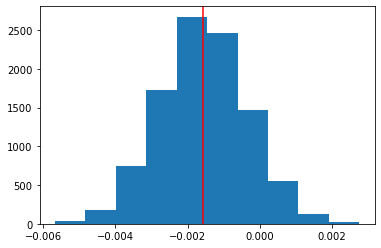

In [42]:
plt.hist(p_diffs)
  
plt.axvline(x=obs_dif , color='red')

proportion of the **p_diffs** are greater than the actual difference observed in **ab_data.csv**

In [43]:
(p_diffs>obs_dif).mean()

0.5067

Doing this in another way

In [44]:
import statsmodels.api as sm
convert_old = df2.query("landing_page == 'old_page' and converted == 1").shape[0]
convert_new = df2.query("landing_page == 'new_page' and converted == 1").shape[0]
n_old = df2.shape[0] - df2.query("landing_page == 'new_page'").shape[0]
n_new = df2.query("landing_page == 'new_page'").shape[0]


m. Now use `stats.proportions_ztest` to compute your test statistic and p-value.  [Here](http://knowledgetack.com/python/statsmodels/proportions_ztest/) is a helpful link on using the built in.

In [45]:
from statsmodels.stats.proportion import proportions_ztest
proportions_ztest([convert_old , convert_new],[n_old , n_new],alternative='smaller')
 

(1.3116075339133115, 0.905173705140591)

<a id='regression'></a>
### Part III - A regression approach
 

 
logistic regression

b. The goal is to use **statsmodels** to fit the regression model you specified in part **a.** to see if there is a significant difference in conversion based on which page a customer receives.  However, you first need to create a column for the intercept, and create a dummy variable column for which page each user received.  Add an **intercept** column, as well as an **ab_page** column, which is 1 when an individual receives the **treatment** and 0 if **control**.

In [39]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, precision_score, recall_score, accuracy_score
from sklearn.model_selection import train_test_split
np.random.seed(42)


In [50]:
from sklearn.datasets import load_iris
from sklearn.linear_model import LogisticRegression 
 
df2[['a_page', 'ab_page']]=pd.get_dummies(df2['landing_page'])
df2=df2.drop('a_page', axis=1  )
#٠0 new , 1 old

In [54]:
X=df2[['ab_page', 'intercept']]
y=df2['converted']
model=sm.Logit(y , X)
results=model.fit()

Optimization terminated successfully.
         Current function value: 0.366118
         Iterations 6


d. Provide the summary of your model below, and use it as necessary to answer the following questions.

In [55]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               290585
Model:                          Logit   Df Residuals:                   290583
Method:                           MLE   Df Model:                            1
Date:                Mon, 14 Feb 2022   Pseudo R-squ.:               8.085e-06
Time:                        04:58:16   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
Covariance Type:            nonrobust   LLR p-value:                    0.1897
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ab_page        0.0150      0.011      1.312      0.190      -0.007       0.037
intercept     -2.0038      0.008   -247.147      0.000      -2.020      -1.988
==============================================================================
"""

Merging with other Countries Data

In [44]:
countries_df = pd.read_csv('./countries.csv')
df_new = countries_df.set_index('user_id').join(df2.set_index('user_id'), how='inner')
df_new.head()

,country,timestamp,group,landing_page,converted,intercept,ab_page
user_id,,,,,,,
834778,UK,2017-01-14 23:08:43.304998,control,old_page,0,1,1
928468,US,2017-01-23 14:44:16.387854,treatment,new_page,0,1,0
822059,UK,2017-01-16 14:04:14.719771,treatment,new_page,1,1,0
711597,UK,2017-01-22 03:14:24.763511,control,old_page,0,1,1
710616,UK,2017-01-16 13:14:44.000513,treatment,new_page,0,1,0


In [45]:
df_new.country.unique()

array(['UK', 'US', 'CA'], dtype=object)

In [46]:
### Create the necessary dummy variables
df_new[['UK' , 'US', 'CA']]=pd.get_dummies(df_new['country'])
df_new.head(3)

,country,timestamp,group,landing_page,converted,intercept,ab_page,UK,US,CA
user_id,,,,,,,,,,
834778,UK,2017-01-14 23:08:43.304998,control,old_page,0,1,1,0,1,0
928468,US,2017-01-23 14:44:16.387854,treatment,new_page,0,1,0,0,0,1
822059,UK,2017-01-16 14:04:14.719771,treatment,new_page,1,1,0,0,1,0


h. Though you have now looked at the individual factors of country and page on conversion, we would now like to look at an interaction between page and country to see if there significant effects on conversion.  Create the necessary additional columns, and fit the new model.  

Provide the summary results, and your conclusions based on the results.

In [47]:
### Fit Your Linear Model And Obtain the Results
X=df_new[['ab_page', 'intercept' ,'UK' , 'US']]
y=df_new['converted']
model=sm.Logit(y , X)
results=model.fit()
results.summary()



Optimization terminated successfully.
         Current function value: 0.366113
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               290584
Model:                          Logit   Df Residuals:                   290580
Method:                           MLE   Df Model:                            3
Date:                Tue, 20 Apr 2021   Pseudo R-squ.:               2.323e-05
Time:                        13:54:08   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
Covariance Type:            nonrobust   LLR p-value:                    0.1760
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ab_page        0.0149      0.011      1.307      0.191      -0.007       0.037
intercept     -2.0042      0.009   -224.560      0.000      -2.022      -1.987
UK            -0.0408      0.027     -1.516      0.130      -0.093       0.012
US             0.0099      0.013      0.743      0.457      -0.016       0.036
==============================================================================
"""

In [48]:
np.exp(-0.0408 ) , np.exp(0.0099)
#on uk the conversion is 0.9 as likely on US
#on US the conversion is 1 as likely on US
#we could notice that there is no really big differance and the country doesn't have big effect on the the conversion
#it do have with 13% for the UK anf 45% for the US that the null hyp is TRUE


(0.9600211149716509, 1.0099491671175422)

In [49]:
df_new['pg_UScountry']=df_new['ab_page']*df_new['US']
df_new['pg_UKfcountry']=df_new['ab_page']*df_new['UK']

In [50]:
X=df_new[['ab_page', 'intercept' ,'UK' , 'US' ,'pg_UScountry' , 'pg_UKfcountry']]
y=df_new['converted']
model=sm.Logit(y , X)
results=model.fit()
results.summary()

#the R value has been increased a little bit but not too much

Optimization terminated successfully.
         Current function value: 0.366109
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               290584
Model:                          Logit   Df Residuals:                   290578
Method:                           MLE   Df Model:                            5
Date:                Tue, 20 Apr 2021   Pseudo R-squ.:               3.482e-05
Time:                        13:55:04   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
Covariance Type:            nonrobust   LLR p-value:                    0.1920
=================================================================================
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
ab_page           0.0206      0.014      1.505      0.132      -0.006       0.047
intercept        -2.0070      0.010   -207.045      0.000      -2.026      -1.988
UK               -0.0644      0.038     -1.679      0.093      -0.140       0.011
US                0.0257      0.019      1.363      0.173      -0.011       0.063
pg_UScountry     -0.0314      0.027     -1.181      0.238      -0.084       0.021
pg_UKfcountry     0.0469      0.054      0.872      0.383      -0.059       0.152
=================================================================================
"""

**CONCLUSION**
I do see that that the new page doesn't have big effect for the conversion rate according to either
comparing it with the group only or both group and country according to the P values and R_squared value 